In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","Manufacturer"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671


In [3]:
data.describe()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,3839.119048,6.132751,0.978836,89.968254,0.984127,0.817460,0.825397,0.119048,0.248677,1.939153,...,0.005291,0.034392,0.013228,0.068783,0.129630,0.156085,0.010582,0.182540,0.222222,9.660766
std,730.000661,0.441658,0.144122,88.120601,0.125150,0.386801,0.380130,0.324274,0.432819,0.239365,...,0.072643,0.182474,0.114399,0.253420,0.336341,0.363417,0.102459,0.386801,0.416291,0.738215
min,1715.000000,4.600000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.515191
25%,3370.000000,6.000000,1.000000,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.121509
50%,4000.000000,6.260000,1.000000,64.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.512148
75%,4230.000000,6.390000,1.000000,128.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.042815
max,6000.000000,6.780000,1.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.013695


In [4]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

## Отстранување на outlierи

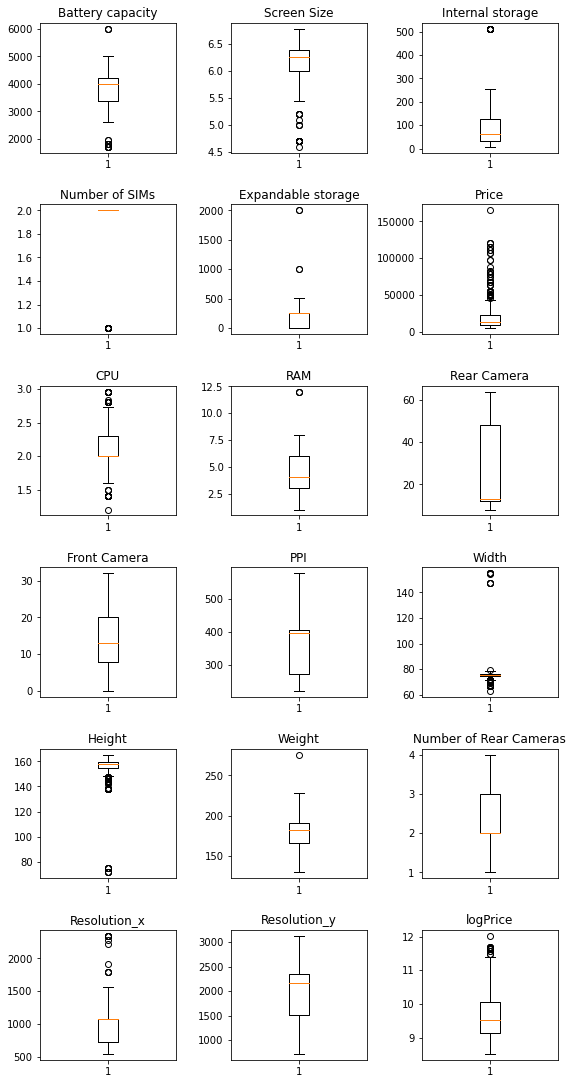

In [5]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.boxplot(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [6]:
for column in numerical_columns:
    data[(np.abs(stats.zscore(data[column])) < 3)].all(axis=1)  #proveri kod
    
print("Number of records after removing outliers = " + str(data.shape[0]))


Number of records after removing outliers = 378


Напиши фенси дека немаме outlierи

## Визуелизации

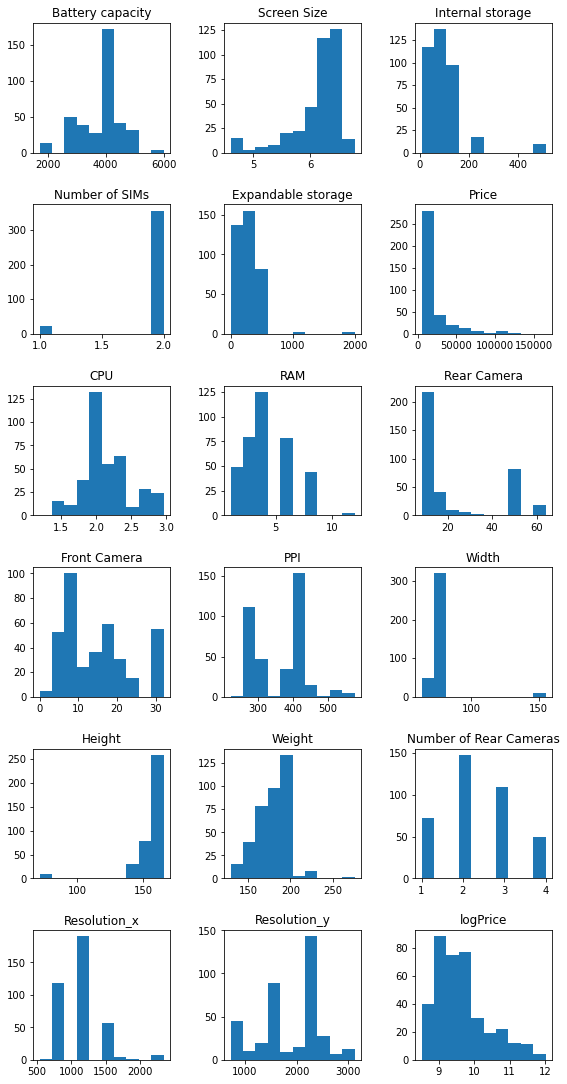

In [7]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.hist(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

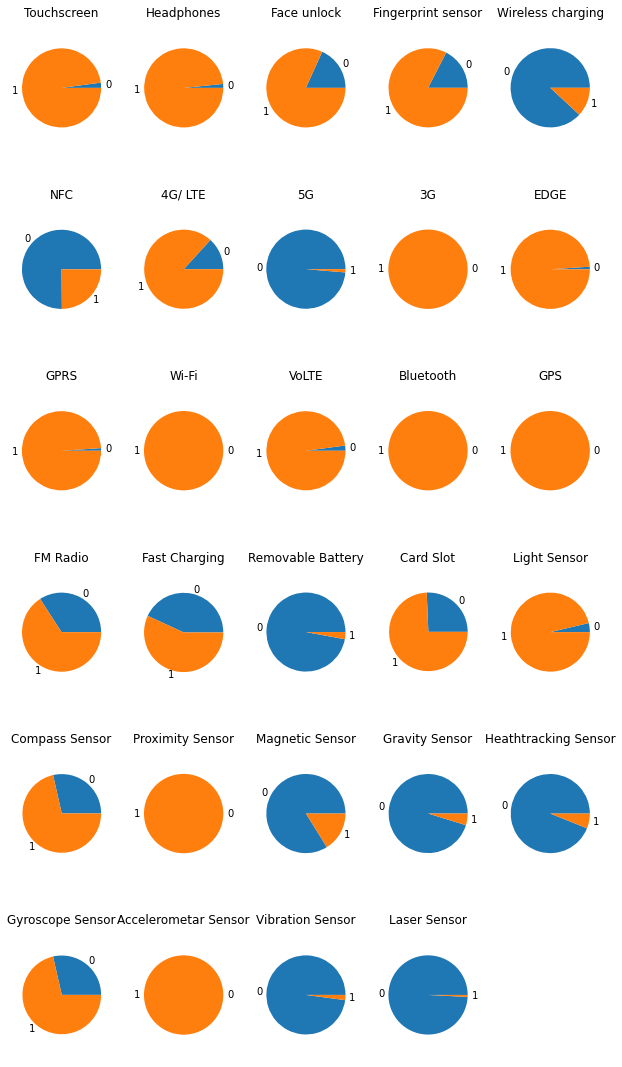

In [8]:
plt.figure(figsize=(10,18))
for i in range(1,len(boolean_columns)+1):
    n = len(data[boolean_columns[i-1]])
    n_1 = sum(data[boolean_columns[i-1]].tolist())
    ax=plt.subplot(6, 5, i)
    patches, texts = ax.pie([n-n_1,n_1],labels=[0,1])
    ax.axis('equal')
    ax.set_title(boolean_columns[i-1])
     
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

Од некои не добиваме никакви информации затоа што сите се сите иста вредност. Имаме и мн со над 90% иста вредност но сега за сега ќе ги оставиме па во процесот на избирање на features за моделите ќе се справиме со нив

In [9]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 66


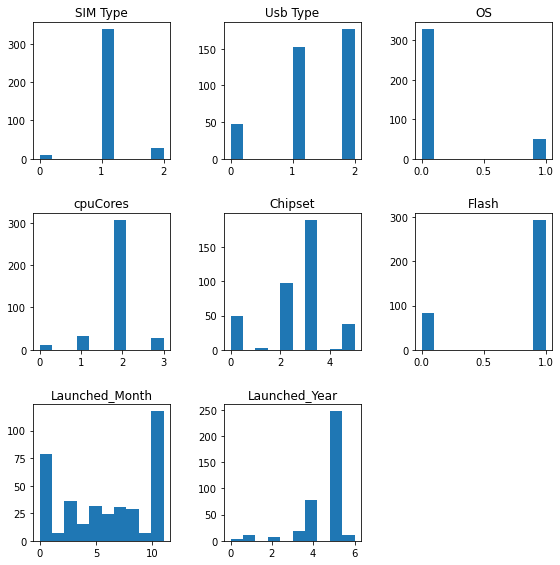

In [10]:
plt.figure(figsize=(9,9))
for i in range(1,len(categorical_columns)+1):
    ax=plt.subplot(3, 3, i)
    ax.hist(data[categorical_columns[i-1]])
    ax.set_title(categorical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [11]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

Text(0.5, 1.0, 'Correlation Heatmap')

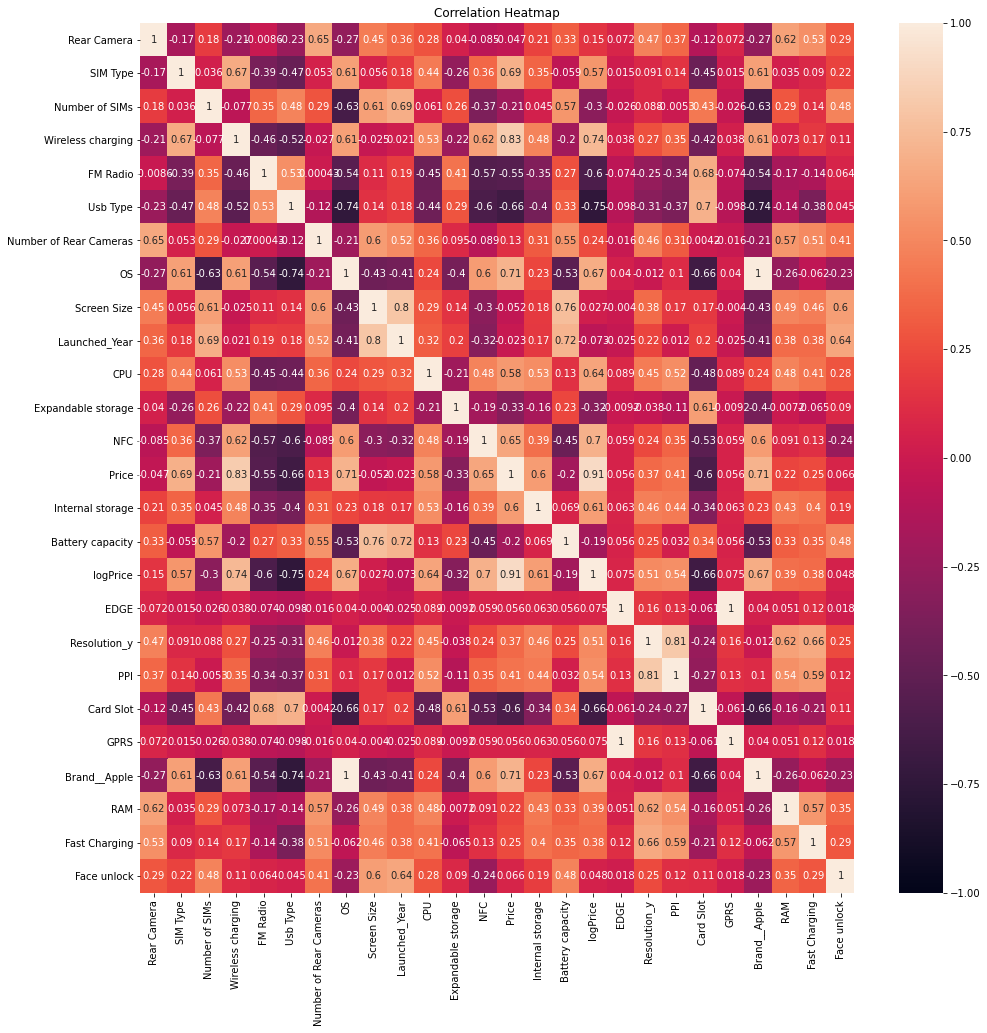

In [12]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [13]:
to_remove = ['OS', 'EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
categorical_columns.remove('OS')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 2 features
Updated number of features = 64


## Регресија

In [14]:
data = data.drop(['Price'], axis=1)
data

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,3000,5.20,1,64,1,0,1,0,1,2.0,...,1,0,0,0,0,0,0,0,0,9.535968
374,3000,5.20,1,32,1,0,1,0,1,2.0,...,1,0,0,0,0,0,0,0,0,9.535968
375,2900,5.70,1,32,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,8.515191
376,3000,5.70,1,64,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,8.809714


In [15]:
features = [x for x in data.columns if x != 'logPrice' ]

In [16]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [17]:
# X_train will include the validation partition
data_train, data_test = train_test_split(data, test_size=0.1, random_state=42)
print(data_train.shape, data_test.shape)

(340, 63) (38, 63)


In [18]:
def my_cv(data_inner, model, steps=10, use_dim_red=False):
    data_inner = data_inner.sort_values(by=['logPrice'])
    number_of_samples = len(data_inner)
    number_of_batches = 10
    batch_size = number_of_samples // number_of_batches
    list_of_classes = []
    fake_class=1
    counter=0
    for _, _ in data_inner.iterrows():
        if counter > fake_class * batch_size and fake_class < number_of_batches:
            fake_class += 1
        list_of_classes.append(fake_class)
        counter += 1
    scores_inner = []
    errors = []
    folder = StratifiedKFold(n_splits=steps)

    splits = folder.split(data_inner, list_of_classes)
    for train_index, val_index in splits:

        training_data = data_inner.iloc[train_index, :]
        validation_data = data_inner.iloc[val_index, :]

        X_train_inner = training_data.drop(['logPrice'], axis=1)
        y_train_inner = training_data['logPrice']

        X_val = validation_data.drop(['logPrice'], axis=1)
        y_val = validation_data['logPrice']

        if use_dim_red:
            fa = FactorAnalysis(n_components=8)
            fa.fit(X_train_inner)
            X_train_inner = fa.transform(X_train_inner)
            X_val = fa.transform(X_val)

        model.fit(X_train_inner, y_train_inner)
        predictions = model.predict(X_val)
        score = model.score(X_val, y_val)
        error = mean_squared_error(predictions, y_val)
        scores_inner.append(score)
        errors.append(error)
        print(score)

    print(f'Scores mean: {np.mean(scores_inner)}')
    print(f'Scores std: {np.std(scores_inner)}')
    print(f'Error mean: {np.mean(errors)}')
    return np.mean(scores_inner)

In [19]:
reg = LinearRegression()
print("Plain data")
my_cv(data_train, reg)
print()
print("Using Dimensionality Reduction (Factor Analysis)")
my_cv(data_train, reg, use_dim_red=True)

Plain data
-9.887438360802745e+23
0.8477298804167848
0.8590063661544172
-2.9265383159163066e+23
-3.870014101189909e+23
0.896542895629769
0.9094563540312817
0.9542687833583421
0.9381289197099952
-1.1116683274377095e+24
Scores mean: -2.7800674052286053e+23
Scores std: 4.093848705598181e+23
Error mean: 1.591354075548513e+23

Using Dimensionality Reduction (Factor Analysis)
0.8265657660989358
0.7947758807882117
0.8297326912072611
0.8485952755288273
0.8490924222200111
0.8673531280783096
0.8571319896708554
0.9155953869004719
0.9073131240714686
0.8841954786856355
Scores mean: 0.8580351143249988
Scores std: 0.0353209185325322
Error mean: 0.0720292949438985


0.8580351143249988

In [20]:
alphas = range(1, 7, 1)
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
for a in alphas:
    for s in solvers:
        ridge = Ridge(alpha=a/10, solver=s)
        print(f"Plain data (alpha={a}, solver={s})")
        my_cv(data_train, ridge)
        print()
        print("Using Dimensionality Reduction (Factor Analysis)")
        my_cv(data_train, ridge, use_dim_red=True)

Plain data (alpha=1, solver=auto)
0.9196185488067831
0.878433556384575
0.8531264527719729
0.867235178987778
0.920860221085119
0.8956073870582805
0.9235385312546753
0.9518707841819657
0.9317050064241333
0.8854993987953765
Scores mean: 0.902749506575066
Scores std: 0.02993263011204365
Error mean: 0.05037782874306853

Using Dimensionality Reduction (Factor Analysis)
0.8265783109541869
0.7947938677471382
0.8297378781711756
0.848591044217226
0.8490421880398047
0.8673429000935697
0.8571593890399885
0.9156158301478822
0.9073526052251568
0.8841574971660932
Scores mean: 0.8580371510802222
Scores std: 0.0353232456920547
Error mean: 0.07202836631577185
Plain data (alpha=1, solver=svd)
0.9196185488067825
0.8784335563845755
0.8531264527719726
0.8672351789877779
0.9208602210851204
0.8956073870582795
0.9235385312546759
0.9518707841819655
0.931705006424133
0.8854993987953772
Scores mean: 0.902749506575066
Scores std: 0.029932630112043664
Error mean: 0.05037782874306851

Using Dimensionality Reduction 

0.7946600317008581
0.829712477133089
0.8486319436704326
0.8491682727196406
0.867328658014098
0.8570008344895669
0.915678325485471
0.907462169911423
0.88411816467709
Scores mean: 0.858009188784085
Scores std: 0.03538968169162737
Error mean: 0.07203737777787635
Plain data (alpha=2, solver=saga)
0.9176925081888707
0.887242383355901
0.8519043128410664
0.8742670575171083
0.9334653470245211
0.8953502654583365
0.927479376874355
0.9502492165321421
0.9292409901717952
0.8890721339762346
Scores mean: 0.9055963591940331
Scores std: 0.029213133824736053
Error mean: 0.04901638179484996

Using Dimensionality Reduction (Factor Analysis)
0.8268086427604437
0.7951244565270081
0.8296217480135916
0.8484496678718982
0.848806060177968
0.8673567706302348
0.8572094247957636
0.9156328818608223
0.9073756438311422
0.8841259280477343
Scores mean: 0.8580511224516607
Scores std: 0.03526685797585381
Error mean: 0.07202442616757265
Plain data (alpha=3, solver=auto)
0.9186683955356469
0.8897464132754751
0.853039786931

0.8929711797088653
Scores mean: 0.9080150244259846
Scores std: 0.028827653134913506
Error mean: 0.047806599632253075

Using Dimensionality Reduction (Factor Analysis)
0.826458468069448
0.7948413094964268
0.8297578117331642
0.848583702617774
0.8488250466612667
0.867312031427826
0.8572544545232019
0.9156836933122399
0.9074731793929395
0.8840558221890406
Scores mean: 0.8580245519423327
Scores std: 0.03534901640588533
Error mean: 0.0720328688495587
Plain data (alpha=4, solver=sag)
0.9186556679892162
0.8918597959761406
0.8533688381423453
0.8805400895751503
0.9398471256419256
0.8965909892370242
0.9309051883125313
0.9483513268749278
0.9291202518743442
0.8915192679622116
Scores mean: 0.9080758541585817
Scores std: 0.028508883128477207
Error mean: 0.04782842126027261

Using Dimensionality Reduction (Factor Analysis)
0.8266572145829646
0.7962400590346219
0.8297840104741159
0.8486089581184312
0.84877960130654
0.867318275292636
0.8572817678372088
0.9156416500010969
0.9073846356615466
0.88407456409

0.9414770934817989
0.8974644585211327
0.9324926302491935
0.9470357637299993
0.9295593747805085
0.8930314901084971
Scores mean: 0.9090616552348264
Scores std: 0.028158721938736243
Error mean: 0.04733563207117438

Using Dimensionality Reduction (Factor Analysis)
0.8266276979598036
0.7948752606148476
0.8297662387307252
0.8485735371736566
0.8487925011018008
0.8672899610869145
0.8573071140182708
0.9157223720631694
0.9075497318456811
0.8839783441084098
Scores mean: 0.858048275870328
Scores std: 0.03533895620714938
Error mean: 0.07202270267218128
Plain data (alpha=6, solver=sparse_cg)
0.9193450588826382
0.8954644467746041
0.8543285968206384
0.8851758785322196
0.9414623463771147
0.896852220023479
0.9320588110423436
0.947075146840089
0.9297732072924751
0.8932065285202464
Scores mean: 0.9094742241105849
Scores std: 0.027763810249114854
Error mean: 0.047153575925418224

Using Dimensionality Reduction (Factor Analysis)
0.8264823789590772
0.7948752606148476
0.8297662387307252
0.8485735371736566
0.8

In [21]:
depths = range(2, 5)
n_estimators=range(5, 30, 5)
max_features=range(8, 12)
min_acc = 0
config = dict()
for d in depths:
    for n in n_estimators:
        for m in max_features:
            print(f"RandomForestRegressor with depth: {d}, no. of estimators: {n} and max features: {m}")
            rfr = RandomForestRegressor(max_depth=d, n_estimators=n, max_features=m)
            acc = my_cv(data_train, rfr)
            if acc > min_acc:
                min_acc = acc
                config['max_depth'] = d
                config['n_estimators'] = n
                config['max_features'] = m
            print()
config

RandomForestRegressor with depth: 2, no. of estimators: 5 and max features: 8
0.6332517083451894
0.6006147762620826
0.7370091005523223
0.7141037568327451
0.7394588949433191
0.7817892027400359
0.7930046081711584
0.8487529459954816
0.8741672526607395
0.7019540206043036
Scores mean: 0.7424106267107378
Scores std: 0.08202228861175545
Error mean: 0.1317720796363172

RandomForestRegressor with depth: 2, no. of estimators: 5 and max features: 9
0.6693417050232001
0.5334763251759036
0.7080105807785234
0.7526706779643619
0.7068992653563135
0.7712727361589609
0.8354991572072696
0.8279206081738422
0.8738991479803504
0.8206711140730618
Scores mean: 0.7499661317891788
Scores std: 0.09549650758594172
Error mean: 0.12446103412182608

RandomForestRegressor with depth: 2, no. of estimators: 5 and max features: 10
0.7084215639746765
0.654883550830986
0.6444331423248242
0.7443710866902616
0.8159036005040485
0.8069834750168687
0.8045905946814671
0.8768775015435637
0.8815924542570828
0.7409508042652373
Sco

0.7684202013927642
0.7293089668160645
0.7266569253044612
0.8207459619690771
0.8006075278517286
0.8302647523612408
0.8468270417382718
0.8951240328550171
0.9148842898719254
0.7086435079399713
Scores mean: 0.8041483208100523
Scores std: 0.0673306083680381
Error mean: 0.10181140659434902

RandomForestRegressor with depth: 3, no. of estimators: 10 and max features: 8
0.7649060771848146
0.6922751913737661
0.7280951747196385
0.8039617826798933
0.8613500293282625
0.8581917051681981
0.8662790848485794
0.9195458562381174
0.9300315388629382
0.8595733015632896
Scores mean: 0.8284209741967498
Scores std: 0.07499073844751843
Error mean: 0.08439581417380063

RandomForestRegressor with depth: 3, no. of estimators: 10 and max features: 9
0.7684012482616972
0.7388602886418576
0.8453293148954674
0.7938653046758843
0.880230064435473
0.8112215035278405
0.8394828939837465
0.8485444042459762
0.9096576732700498
0.8569251643572506
Scores mean: 0.8292517860295243
Scores std: 0.04900589756202031
Error mean: 0.08

0.7989659592942554
Scores mean: 0.8568762724612918
Scores std: 0.0416641342288588
Error mean: 0.07651865942312355

RandomForestRegressor with depth: 4, no. of estimators: 10 and max features: 10
0.8440407038031086
0.8121934908703411
0.8561764413591123
0.8087530233134013
0.8662626395151819
0.8795800610343047
0.8766515170676706
0.8720265466591933
0.9488461831885351
0.8637904516227811
Scores mean: 0.8628321058433629
Scores std: 0.037220085323735545
Error mean: 0.07038734199525644

RandomForestRegressor with depth: 4, no. of estimators: 10 and max features: 11
0.8337864795151906
0.8161188014458982
0.8047588929319447
0.8293196287535587
0.8734739739053432
0.9032576342478664
0.886248721531431
0.916570209598804
0.9444396826747778
0.8414550343065498
Scores mean: 0.8649429058911364
Scores std: 0.04447154235979367
Error mean: 0.068881077138932

RandomForestRegressor with depth: 4, no. of estimators: 15 and max features: 8
0.843745040319846
0.8148479603776464
0.7666551155405896
0.8611943561311933


{'max_depth': 4, 'n_estimators': 15, 'max_features': 10}

In [22]:
neighbors = range(1, 7)
algs = ['auto', 'ball_tree', 'kd_tree', 'brute']
max_acc = 0
knn_conf = dict()
for n in neighbors:
    for alg in algs:
        knnr = KNeighborsRegressor(n, algorithm=alg)
        print(f"Plain data neighbors={n}")
        acc = my_cv(data_train, knnr)
        print("Using Dimensionality Reduction (Factor Analysis)")
        my_cv(data_train, knnr, use_dim_red=True)
        if acc > max_acc:
            max_acc = acc
            knn_conf['n']=n
            knn_conf['algorithm']=alg
        print()

Plain data neighbors=1
0.8055375027038908
0.9088875343842114
0.8725338136574201
0.8076788882381625
0.8972809654739757
0.7566351599164843
0.8609733478100337
0.9152555925384669
0.9486052387249458
0.922190820646272
Scores mean: 0.8695578864093862
Scores std: 0.058467164196327144
Error mean: 0.06553618262050888
Using Dimensionality Reduction (Factor Analysis)
0.8662838588779529
0.8552304674615782
0.6490669635825805
0.8052228455819627
0.7707037711538468
0.8228887318473658
0.8404222093840025
0.9315429694080715
0.9665441618412316
0.9041558757391902
Scores mean: 0.8412061854877783
Scores std: 0.08495739640205541
Error mean: 0.07743569716874006

Plain data neighbors=1
0.8055375027038908
0.9088875343842114
0.8725338136574201
0.8076788882381625
0.8972809654739757
0.7566351599164843
0.8609733478100337
0.9152555925384669
0.9486052387249458
0.922190820646272
Scores mean: 0.8695578864093862
Scores std: 0.058467164196327144
Error mean: 0.06553618262050888
Using Dimensionality Reduction (Factor Analysi

0.930127272260934
0.8950440418520944
Scores mean: 0.8489331696271881
Scores std: 0.07353073176430895
Error mean: 0.07441678137430567

Plain data neighbors=4
0.8569498488728347
0.8650692335279448
0.7866435834482057
0.7591261757185865
0.8840300021818385
0.8211496960984643
0.8818757795463141
0.9293852131393723
0.9578142918346807
0.9048464014138692
Scores mean: 0.864689022578211
Scores std: 0.0585920673433677
Error mean: 0.06703282794108398
Using Dimensionality Reduction (Factor Analysis)
0.8877212000745638
0.8066687739350893
0.6849361662077619
0.7762215314829668
0.8209253093624046
0.8756944344585463
0.8737405808763222
0.9372454567077511
0.930127272260934
0.8950440418520944
Scores mean: 0.8488324767218434
Scores std: 0.07355709115025587
Error mean: 0.07447130973550287

Plain data neighbors=4
0.8569498488728347
0.8650692335279448
0.7866435834482062
0.7597095960616871
0.8840300021818385
0.8211496960984643
0.884560778758561
0.9287958753931093
0.9578142918346807
0.9026354263145624
Scores mean:

In [23]:
knn_conf

{'n': 2, 'algorithm': 'auto'}

In [24]:
reg_fin = LinearRegression()
ridge_fin = Ridge()
rfr_fin = RandomForestRegressor(max_depth=4, n_estimators=25, max_features=9)
knnr_fin = KNeighborsRegressor(2, algorithm='auto')

model_name_list = [
    ('LinearRegression', reg_fin),
    ('Ridge', ridge_fin),
    ('RandomForestRegressor', rfr_fin),
    ('KNeighborsRegressor', knnr_fin)
]

for name, model in model_name_list:
    print(f"Model: {name}")
    model.fit(data_train[features], data_train['logPrice'])
    pred = model.predict(data_test[features])
    print("Regression score:", model.score(data_test[features], data_test['logPrice']))
    print("Mean square error: ", mean_squared_error(pred, data_test['logPrice']))
    print()


Model: LinearRegression
Regression score: 0.9075700673198639
Mean square error:  0.044960408203435186

Model: Ridge
Regression score: 0.9132373079193474
Mean square error:  0.04220370976872328

Model: RandomForestRegressor
Regression score: 0.89229275339975
Mean square error:  0.0523917050807936

Model: KNeighborsRegressor
Regression score: 0.8941178829383377
Mean square error:  0.051503912926243144

